*Clean up files from previous run, and re-download Snudda. You can comment out this block the second time you run it if you want.*

In [1]:
!rm -rf Snudda .ipynb_checkpoints
!git clone https://github.com/Hjorthmedh/Snudda.git

Cloning into 'Snudda'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 5092 (delta 203), reused 339 (delta 174), pack-reused 4708
Receiving objects: 100% (5092/5092), 217.97 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (3585/3585), done.


This example creates a small toy example, you can increase the network size. For more information please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide

In [2]:
cd Snudda

In [3]:
#!rm -r /opt/app-root/lib/nrn
#!ln -s /opt/app-root/lib/nrn/lib64 /opt/app-root/lib/nrn/lib

*This activates a specific version of Snudda.*

In [4]:
#!git reset --hard 96669669fb9ad0875b7bc36028ce0070254158c5

*Install required python packages*

In [5]:
!pip3 install --upgrade -e .[dev]

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/akozlov/tmp/Snudda


  Attempting uninstall: snudda
    Found existing installation: snudda 0.0.1b0
    Uninstalling snudda-0.0.1b0:
      Successfully uninstalled snudda-0.0.1b0
  Running setup.py develop for snudda


*Setup a small striatal network. This writes the config file network-config.json, if you want to make a bigger or smaller network, change the networks size. Overwrite means that we do not abort if the networks directory exists, instead we replace it.*

In [6]:
!snudda init networks/tinySim --size 100 --overwrite 

Creating config file
Network path: networks/tinySim
Creating missing directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs
Adding neurons: dSPN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn
Adding neurons: iSPN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/ispn
Adding neurons: ChIN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0

*Place the neurons based on the network config file. Positions are written to the file network-neuron-positions.hdf5*

In [7]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.019391645000723656 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_0
No cache file found.
Saving cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs/str-fs-e160628_FS2-mMTC180800A-

Place synapses between neurons in the network by looking for places where axons and dendrites of different neurons overlap.

In [8]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 3918408, 'free': 3031388, 'used': 887020}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_0
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_2
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn/str-dsp

Processing hyper voxel : 4/64 (56 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.047101423999265535s, hyperID: 4
Create lookup table
detectSynapses: 34 took 0.01280930600114516s
Create lookup table
detectGapJunctions: 0.015483949000554276s
Wrote hyper voxel 4 (34 synapses, 0 gap junctions)
HyperID 4 completed - 34 synapses and 0 gap junctions found (35.64582830099971s)
Processing hyper voxel : 22/64 (56 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.12498614799915231s, hyperID: 22
Create lookup table
detectSynapses: 24 took 0.010704456000894425s
Create lookup table
detectGapJunctions: 0.01282517999970878s
Wrote hyper voxel 22 (24 synapses, 0 gap junctions)
HyperID 22 completed - 24 synapses and 0 gap junctions found (31.00895292399946s)
Processing hyper voxel : 25/64 (48 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
Trying to place 496767 

Processing hyper voxel : 14/64 (1 neurons)
Trying to place 538766 points to get 3371.0 axon voxels filled
placeSynapsesNoAxonSphere: 0.19939571699978842s, hyperID: 14
Create lookup table
detectSynapses: 0 took 0.009519962999547715s
Create lookup table
detectGapJunctions: 0.005293844998959685s
Wrote hyper voxel 14 (0 synapses, 0 gap junctions)
HyperID 14 completed - 0 synapses and 0 gap junctions found (0.3836543739998888s)

Program run time: 623.6865865740001


*Pruning the detected synapses to get the final set of synapses*

In [9]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
/home/akozlov/tmp/Snudda/snudda/prune.py:352: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.SlurmID = self.histFile["meta/SlurmID"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:353: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.hyperVoxelIDs = self.histFile["meta/hyperVoxelIDs"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:354: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.allHyperIDs = self.histFile["allHyperIDs"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:355: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.voxelSize = self.histFile["meta/voxelSize"].value
/home/akozlov/tmp/Snudda/

Pruning range : (0, 125395)
Number of synapses removed where synapse connection not allowed: 0
Number of synapses removed due to distance dependent pruning: 31381
Number of synapses removed randomly: 78375
Number of synapses removed due to too many synapses between connected pair: 976
Number of synapses removed due to too few synapses between connected pairs: 5153
Number of synapses removed where all synapses between pairs are removed: 2386
pruneSynapses called.
pruneSynapses: No gapJunctions skipping pruning
/home/akozlov/tmp/Snudda/snudda/prune.py:248: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nSynBefore = np.sum(self.histFile["nSynapses"].value)
/home/akozlov/tmp/Snudda/snudda/prune.py:251: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nOverflow = np.sum(self.histFile["voxelOverflowCounter"].value)
/home/akozlov/tmp/Snudda/snudda/prune.py:252: H5pyDeprecationWarning: dataset.value has been deprecated

*Generate network input for the simulation. If you want to do more than 1 second you need to increase time below.*

In [10]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
/home/akozlov/tmp/Snudda/snudda/input.py:1071: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkConfigFile = f["meta"]["configFile"].value
/home/akozlov/tmp/Snudda/snudda/input.py:1072: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.positionFile = f["meta"]["positionFile"].value
/home/akozlov/tmp/Snudda/snudda/input.py:1073: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkSlurmID = int(f["meta/SlurmID"].value)
/home/akozlov/tmp/Snudda/snudda/input.py:1075: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.axonStumpIDFlag = f["meta/axonStumpIDFlag"].value
Loadin

Gathering 23 - Thalamic
Generating 195 inputs for dSPN_0
Gathering 24 - CorticalBase
Generating 187 inputs for dSPN_0
Gathering 24 - CorticalSignal
Generating 99 inputs for dSPN_0
Gathering 24 - Thalamic
Generating 181 inputs for iSPN_3
Gathering 25 - CorticalBase
Generating 156 inputs for iSPN_3
Gathering 25 - CorticalSignal
Generating 117 inputs for iSPN_3
Gathering 25 - Thalamic
Generating 203 inputs for iSPN_2
Gathering 26 - CorticalBase
Generating 202 inputs for iSPN_2
Gathering 26 - CorticalSignal
Generating 124 inputs for iSPN_2
Gathering 26 - Thalamic
Generating 147 inputs for iSPN_0
Gathering 27 - CorticalBase
Generating 134 inputs for iSPN_0
Gathering 27 - CorticalSignal
Generating 91 inputs for iSPN_0
Gathering 27 - Thalamic
Generating 183 inputs for dSPN_0
Gathering 28 - CorticalBase
Generating 190 inputs for dSPN_0
Gathering 28 - CorticalSignal
Generating 137 inputs for dSPN_0
Gathering 28 - Thalamic
Generating 203 inputs for dSPN_0
Gathering 29 - CorticalBase
Generating 1

Generating 67 inputs for iSPN_1
Gathering 68 - Thalamic
Generating 107 inputs for iSPN_1
Gathering 69 - CorticalBase
Generating 95 inputs for iSPN_1
Gathering 69 - CorticalSignal
Generating 43 inputs for iSPN_1
Gathering 69 - Thalamic
Generating 174 inputs for iSPN_3
Gathering 70 - CorticalBase
Generating 162 inputs for iSPN_3
Gathering 70 - CorticalSignal
Generating 94 inputs for iSPN_3
Gathering 70 - Thalamic
Generating 125 inputs for iSPN_0
Gathering 71 - CorticalBase
Generating 148 inputs for iSPN_0
Gathering 71 - CorticalSignal
Generating 79 inputs for iSPN_0
Gathering 71 - Thalamic
Generating 186 inputs for dSPN_2
Gathering 72 - CorticalBase
Generating 186 inputs for dSPN_2
Gathering 72 - CorticalSignal
Generating 116 inputs for dSPN_2
Gathering 72 - Thalamic
Generating 126 inputs for iSPN_0
Gathering 73 - CorticalBase
Generating 144 inputs for iSPN_0
Gathering 73 - CorticalSignal
Generating 87 inputs for iSPN_0
Gathering 73 - Thalamic
Generating 238 inputs for dSPN_3
Gathering 7

*Prepare mod files for neuron simulation.*

In [11]:
!nrnivmodl snudda/data/cellspecs/mechanisms

Creating x86_64 directory for .o files.

/home/akozlov/tmp/Snudda
ls: cannot access 'snudda/data/cellspecs/mechanisms/*.inc': No such file or directory
snudda/data/cellspecs/mechanisms/Kv3_ch.mod snudda/data/cellspecs/mechanisms/bk_ch.mod snudda/data/cellspecs/mechanisms/bk_fs.mod snudda/data/cellspecs/mechanisms/bk_ms.mod snudda/data/cellspecs/mechanisms/ca_ch.mod snudda/data/cellspecs/mechanisms/cadyn_fs.mod snudda/data/cellspecs/mechanisms/cadyn_ms.mod snudda/data/cellspecs/mechanisms/cal12_ms.mod snudda/data/cellspecs/mechanisms/cal13_ms.mod snudda/data/cellspecs/mechanisms/cal_ch.mod snudda/data/cellspecs/mechanisms/caldyn_ms.mod snudda/data/cellspecs/mechanisms/can_fs.mod snudda/data/cellspecs/mechanisms/can_ms.mod snudda/data/cellspecs/mechanisms/cap_ch.mod snudda/data/cellspecs/mechanisms/caq_fs.mod snudda/data/cellspecs/mechanisms/caq_ms.mod snudda/data/cellspecs/mechanisms/car_fs.mod snudda/data/cellspecs/mechanisms/car_ms.mod snudda/data/cellspecs/mechanisms/cat32_ms.mod snu

"/usr/bin/nocmodl" can_ms
Translating can_ms.mod into can_ms.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o can_ms.lo can_ms.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c can_fs.c  -fPIC -DPIC -o .libs/can_fs.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c can_ms.c  -fPIC -DPIC -o .libs/can_ms.o
"/usr/bin/nocmodl" cap_ch
"/usr/bin/nocmodl" caq_fs
Translating cap_ch.mod into cap_ch.c
Notice: Assignment to the GLOBAL variable, "mtau", is not thread safe
Notice: Assignment to the GLOBAL variable, "minf", is not thread safe
Translating caq_fs.mod into caq_fs.c
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o cap_ch.lo cap_ch.c
Thread Safe
"/usr/share/nrn

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kdr_ms.c  -fPIC -DPIC -o .libs/kdr_ms.o
"/usr/bin/nocmodl" kir2_ch
Translating kir2_ch.mod into kir2_ch.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir2_ch.lo kir2_ch.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kdrbca1_lts.c  -fPIC -DPIC -o .libs/kdrbca1_lts.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kir2_ch.c  -fPIC -DPIC -o .libs/kir2_ch.o
"/usr/bin/nocmodl" kir_fs
Translating kir_fs.mod into kir_fs.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir_fs.lo kir_fs.c
"/usr/bin/nocmodl" kir_ms
Translating kir_ms.mod into 

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c tmnmda.c  -fPIC -DPIC -o .libs/tmnmda.o
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c vecevent.c  -fPIC -DPIC -o .libs/vecevent.o
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -O2 -pipe -mtune=native    -o libnrnmech.la -rpath "/usr/lib"  Kv3_ch.lo bk_ch.lo bk_fs.lo bk_ms.lo ca_ch.lo cadyn_fs.lo cadyn_ms.lo cal12_ms.lo cal13_ms.lo cal_ch.lo caldyn_ms.lo can_fs.lo can_ms.lo cap_ch.lo caq_fs.lo caq_ms.lo car_fs.lo car_ms.lo cat32_ms.lo cat33_ms.lo h_lts.lo hcn12_ch.lo im_lts.lo it_lts.lo ka

In [12]:
# This generates the plots from the analysis for the connectivity
# !python3 snudda/analyse_striatum.py networks/tinySim

*Run the simulation in Neuron.*

In [13]:
#!snudda simulate networks/tinySim --time 0.1 --voltOut networks/tinySim/volt.txt
#!mpirun -n 4 snudda simulate networks/tinySim/ --time 1.0 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt
!snudda simulate networks/tinySim/ --time 0.1 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

Creating missing directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"]

Neuron dSPN_1 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 34 iSPN_0
Neuron iSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 35 dSPN_0
Neuron dSPN_0 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 36 dSPN_2
Neuron dSPN_2 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 37 dSPN_1
Neuron dSPN_1 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 38 iSPN_3
Neuron iSPN_3 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 39 iSPN_3
Neuron iSPN_3 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 40 dSPN_1
Neuron dSPN_1 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 41 dSPN_0
Neuron dSPN_0 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 42 dSPN_1
N

Running simulation for 0.1 s
1% done. Elapsed: 7.9 s, estimated time left: 777.9 s
2% done. Elapsed: 15.1 s, estimated time left: 739.3 s
3% done. Elapsed: 22.3 s, estimated time left: 721.3 s
4% done. Elapsed: 29.5 s, estimated time left: 707.9 s
5% done. Elapsed: 36.7 s, estimated time left: 697.5 s
6% done. Elapsed: 43.9 s, estimated time left: 688.0 s
7% done. Elapsed: 51.1 s, estimated time left: 678.9 s
8% done. Elapsed: 58.3 s, estimated time left: 670.1 s
9% done. Elapsed: 65.5 s, estimated time left: 662.0 s
10% done. Elapsed: 72.7 s, estimated time left: 654.1 s
11% done. Elapsed: 79.9 s, estimated time left: 646.4 s
12% done. Elapsed: 87.1 s, estimated time left: 638.7 s
13% done. Elapsed: 94.3 s, estimated time left: 631.2 s
14% done. Elapsed: 101.5 s, estimated time left: 623.5 s
15% done. Elapsed: 108.7 s, estimated time left: 615.7 s
16% done. Elapsed: 115.8 s, estimated time left: 608.1 s
17% done. Elapsed: 123.0 s, estimated time left: 600.7 s
18% done. Elapsed: 130.3 

In [14]:
%matplotlib inline

In [15]:
# This generates the spike raster in command line
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/output-spikes.txt networks/tinySim/network-pruned-synapses.hdf5
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/simulation/network-output-spikes-666.txt networks/tinySim/network-pruned-synapses.hdf5

In [16]:
# This generates volt traces in command line
# !python3 snudda/plotting/Network_plot_traces.py networks/tinySim/simulation/volt.txt networks/tinySim/network-pruned-synapses.hdf5

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7124 synapses and 10000 gap junctions
Load done. 0.06904307100012375
Sort the traces
Sort the traces


/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/tmp/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/tmp/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/akozlov/tmp/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/akozlov/tmp/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile

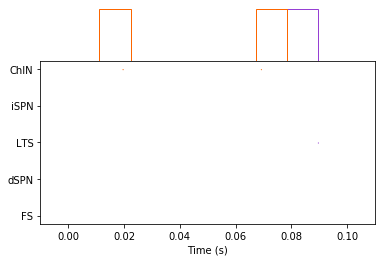

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [17]:
# This generates spike raster, plot visible in the jupyter notebook
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7124 synapses and 10000 gap junctions
Load done. 0.0687782770000922
!!! Excluding first 0s from the plot
Plotting traces: [1, 2, 5, 7, 8]
Plotted 5 traces (total 99)


/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/tmp/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/tmp/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/akozlov/tmp/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/akozlov/tmp/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile

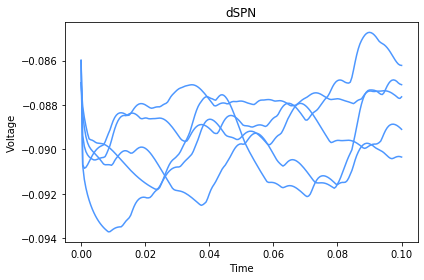

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [0, 3, 4, 6, 10]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

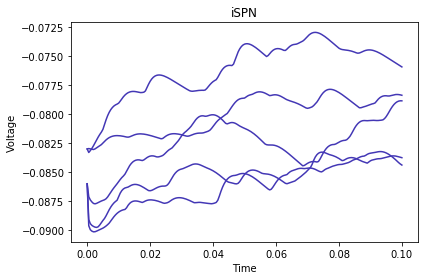

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [93]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

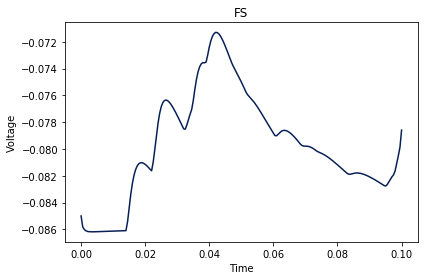

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [86]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

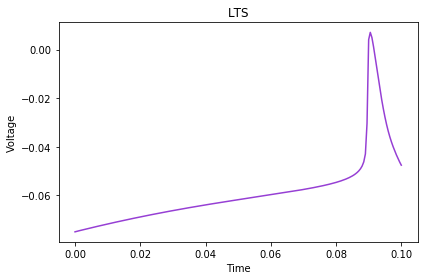

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [61]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

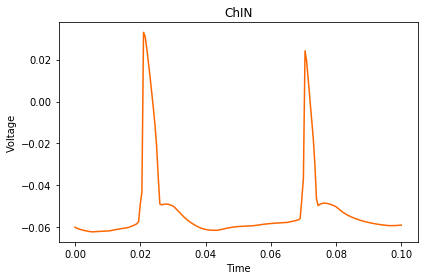

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [18]:
# This generates the voltage trace, plot visible in jupyter notebook
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"

plotOffset = 0 # -0.2
skipTime = 0 #0.5
nTracesMax = 5
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7124 synapses and 10000 gap junctions
Load done. 0.058130854999035364
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.0024169909993361216 seconds
Created connection matrix 0.02245842599950265 seconds
GJ row : 0 - 0.0 %  time : 0.0019104469993180828 seconds
Created gap junction connection matrix 0.06826995799929136 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 7124, at 0
Created distance histogram (optimised) in 0.0196509760007757 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/tmp/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/tmp/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:117: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if(type(f["meta/SlurmID"].value) == bytes):
/home/akozlov/tmp/Snudda/snudda/load.py:120: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["Slu

Requested: 10000000.0 calculated [2052.]
Rejected (too large z-depth): 252
P(d<5e-05)=0.060810810810810814
P(d<0.0001)=0.05286343612334802


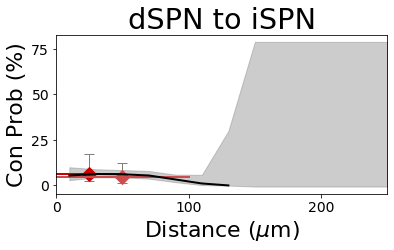

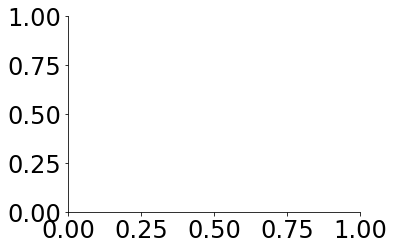

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1926.]
Rejected (too large z-depth): 330
P(d<5e-05)=0.2802607076350093
P(d<0.0001)=0.24739039665970772


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


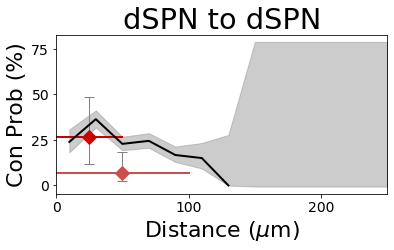

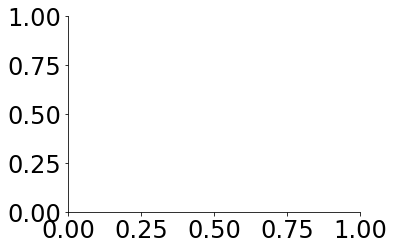

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2052.]
Rejected (too large z-depth): 252
P(d<5e-05)=0.30067567567567566


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


P(d<0.0001)=0.2623592755751346


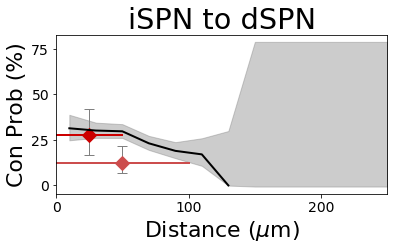

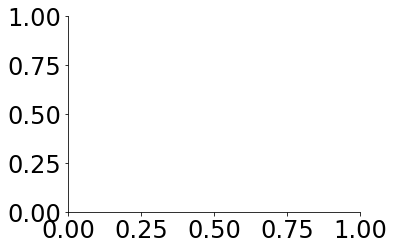

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2016.]
Rejected (too large z-depth): 240
P(d<5e-05)=0.37637362637362637
P(d<0.0001)=0.3240279162512463


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


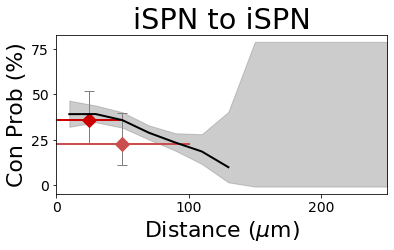

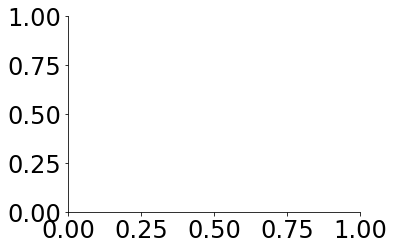

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [43.]
Rejected (too large z-depth): 5
P(d<0.0001)=0.5813953488372093
P(d<0.00015)=0.5813953488372093
P(d<0.00025)=0.5813953488372093


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


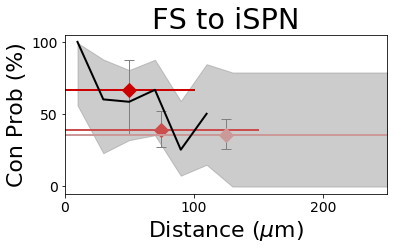

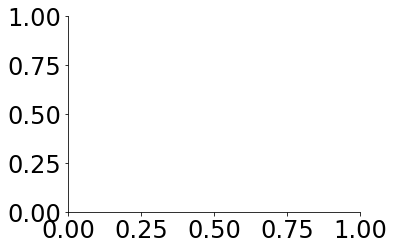

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [40.]
Rejected (too large z-depth): 8
P(d<0.0001)=0.7
P(d<0.00015)=0.7
P(d<0.00025)=0.7


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


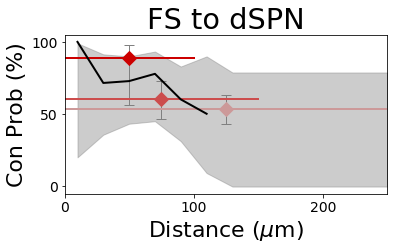

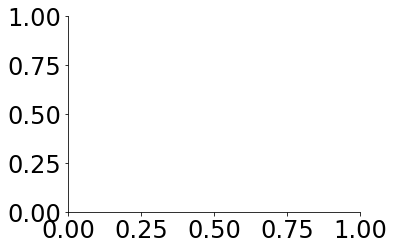

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


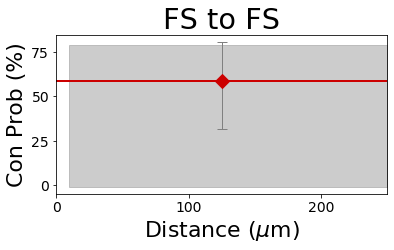

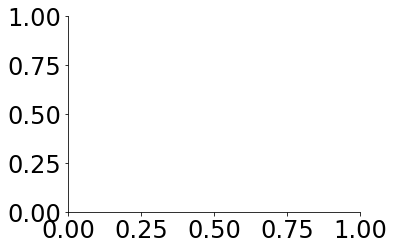

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


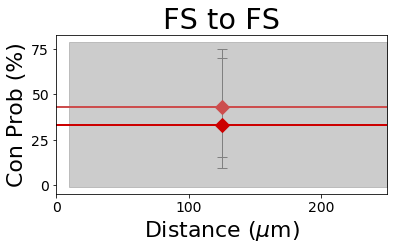

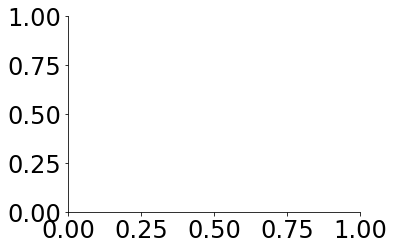

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.10416666666666667


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


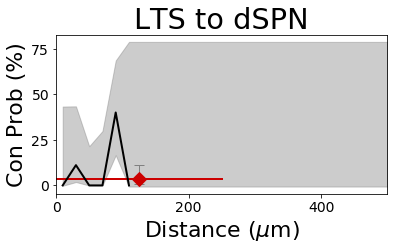

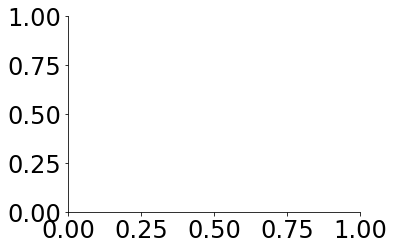

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [42.]
Rejected (too large z-depth): 6
P(d<0.00025)=0.047619047619047616


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


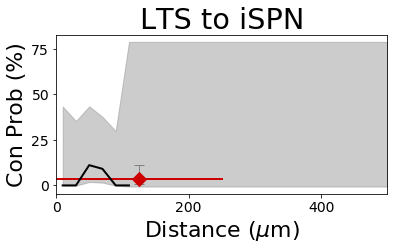

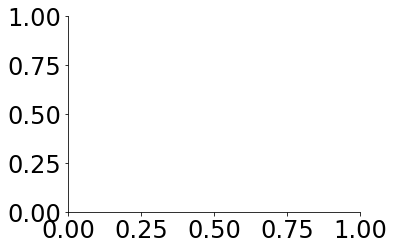

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


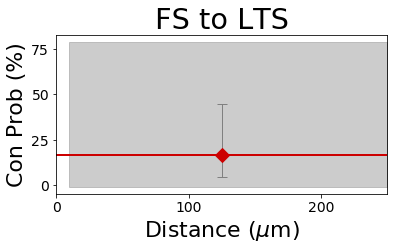

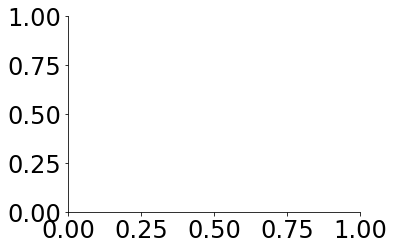

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


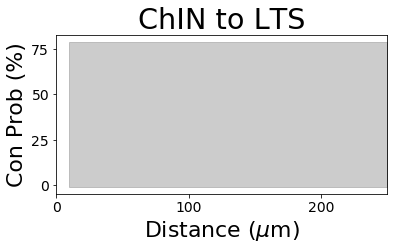

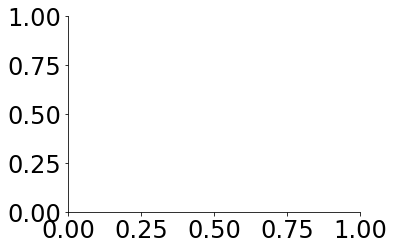

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [34.]
Rejected (too large z-depth): 14
P(d<0.00025)=0.0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


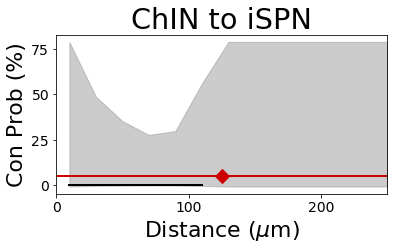

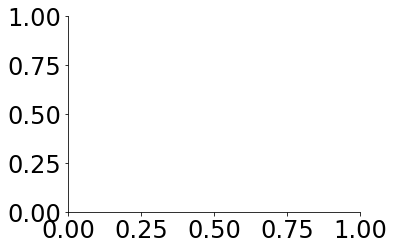

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [30.]
Rejected (too large z-depth): 18
P(d<0.00025)=0.0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


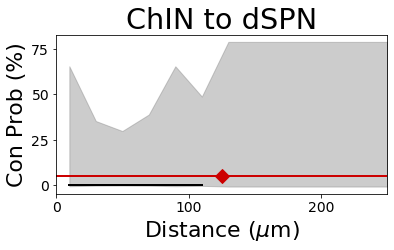

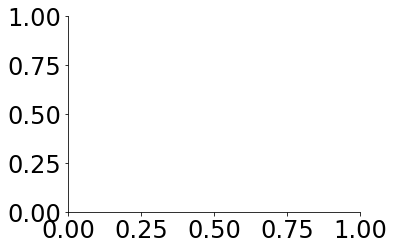

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


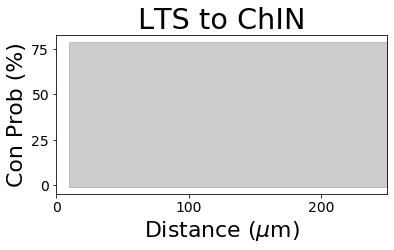

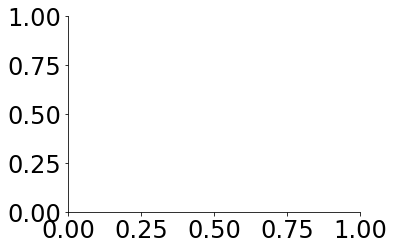

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 1


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


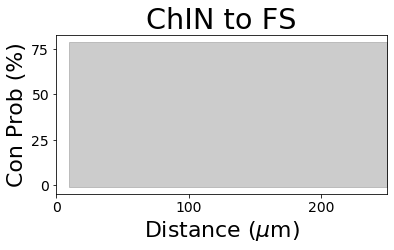

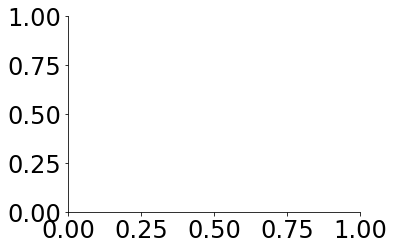

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [30.]
Rejected (too large z-depth): 18


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


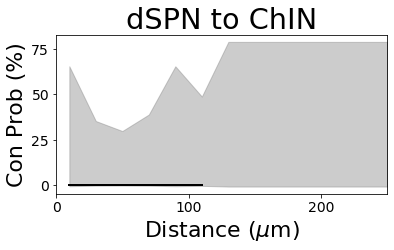

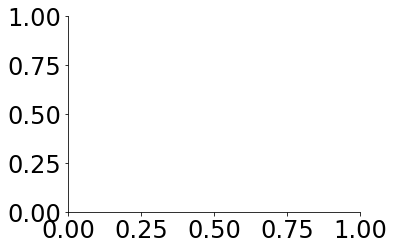

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [34.]
Rejected (too large z-depth): 14


/home/akozlov/tmp/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


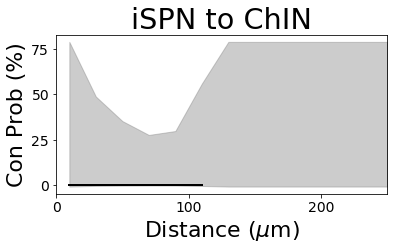

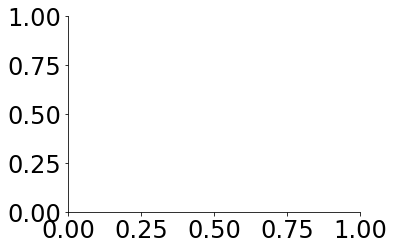

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [19]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)

